In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scifit.solvers import FitSolver1D

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [3]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, mu, sigma):
        return 1/(x[:,0] * sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * np.power((np.log(x[:, 0]) - mu) / sigma, 2))

In [4]:
model = Model()

In [5]:
#x = np.logspace(-3, 5, 50, base=10).reshape(-1, 1)
x = np.logspace(-1, 3, 50, base=10).reshape(-1, 1)

In [24]:
data = model.synthetic_dataset(xdata=x, sigma=3e-2, scale_mode="rel", generator=np.random.uniform, parameters=(3., 0.7))
#data["sy"] += 1e-18

In [25]:
data

,x0,y,sy,yref,ynoise
id,,,,,
1,0.100000,7.731019e-12,3.005922e-11,1.974093e-12,5.756926e-12
2,0.120679,3.095192e-11,3.036191e-11,1.206351e-11,1.888841e-11
3,0.145635,8.262327e-11,3.205772e-11,6.859071e-11,1.403255e-11
4,0.175751,3.949726e-10,4.088588e-11,3.628626e-10,3.211007e-11
5,0.212095,1.851287e-09,8.358283e-11,1.786094e-09,6.519258e-11
6,0.255955,8.255046e-09,2.753992e-10,8.179974e-09,7.507179e-11
7,0.308884,3.515398e-08,1.075698e-09,3.485659e-08,2.973919e-10
8,0.372759,1.415470e-07,4.175953e-09,1.381984e-07,3.348581e-09
9,0.449843,5.244909e-07,1.532425e-08,5.098082e-07,1.468276e-08


In [26]:
sol = model.fit(data)#, p0=(0.5, 0.5))

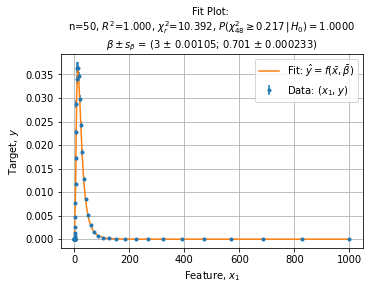

In [27]:
axe = model.plot_fit()

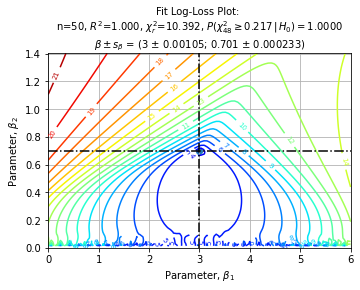

In [28]:
axe = model.plot_loss(log_loss=True, factor=10, levels=20)

In [29]:
X = np.log10(data.x0.values).reshape(-1, 1)
y = np.log10(data.y.values)

In [30]:
poly = PolynomialFeatures(2)
linreg = LinearRegression(fit_intercept=False)
pipe = make_pipeline(poly, linreg)

In [31]:
pipe.fit(X, y)
pipe.score(X, y)

0.9992294608239538

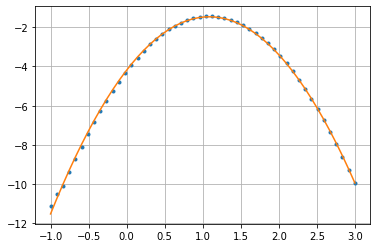

In [32]:
fig, axe = plt.subplots()
axe.plot(X, y, linestyle="none", marker=".")
axe.plot(X, pipe.predict(X))
axe.grid()

In [33]:
b0, b1, b2 = pipe.steps[1][1].coef_

In [34]:
pipe.steps[1][1].coef_

array([-4.18734009,  5.01976446, -2.31288326])

In [35]:
s = np.sqrt(-0.5/b2)
m = s**2*(b1 + 1)
m, s

(1.3013550153756732, 0.46495202739549696)